# Little descriptive look on the scraped data

In [15]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


In [16]:
# load data
with open('dataframe_papers.pickle', 'rb') as f:
    df = pickle.load(f)
    
# define variable types automatically (integer, string etc. ...)
df = df.infer_objects()

# reset index (fragment from the script 2)
df.reset_index(inplace=True,drop=True)

# introduce variable in date time format
df["dt_year"] = pd.to_datetime(df["year"], format="%Y")

# get data set from 2000 until 2021 for better overview
# before 2000 marginal number of papers, year 2022 incomplete
df_until2021 = df[df["year"]<="2021"]
df_00_21 = df_until2021[df_until2021["year"]>="2000"]

<AxesSubplot:title={'center':'# of papers per year'}, xlabel='dt_year'>

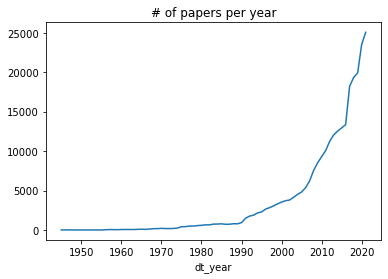

In [17]:
df_until2021.groupby(df_until2021.dt_year.dt.year).sum().sum(axis=1).plot(title="# of papers per year")

<AxesSubplot:title={'center':'# of papers 2000 until 2020'}, xlabel='dt_year'>

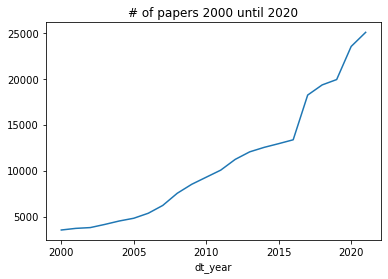

In [18]:
df_00_21.groupby(df_00_21.dt_year.dt.year).sum().sum(axis=1).plot(title="# of papers 2000 until 2020")

<AxesSubplot:title={'center':'most common keywords, papers per year'}, xlabel='dt_year'>

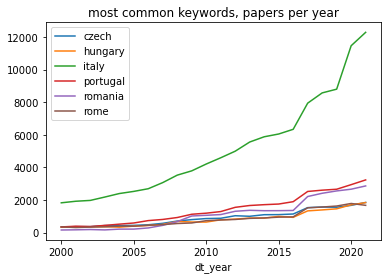

In [21]:
df_n_keys = df_00_21.groupby(df_00_21.dt_year.dt.year).sum()
df_n_keys[df_n_keys.columns[df_n_keys.max() > 1500]].plot(title="most common keywords, papers per year")

<AxesSubplot:title={'center':'# papers per keyword'}>

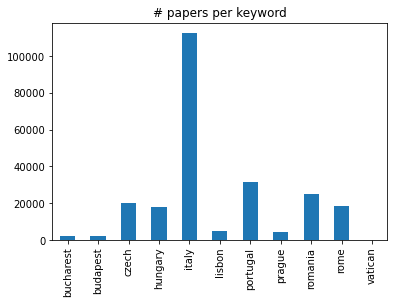

In [22]:
df_00_21.groupby(df_00_21.dt_year.dt.year).sum().sum(axis=0).plot(kind="bar", title="# papers per keyword")

Text(0.5, 1.0, 'Distribution paper per year')

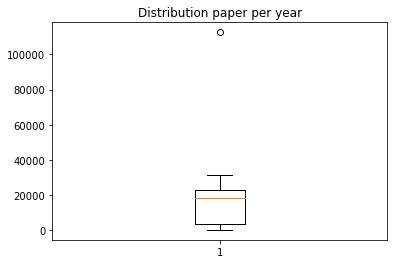

In [23]:
plt.boxplot(df_00_21.groupby(df_00_21.dt_year.dt.year).sum().sum(axis=0))
plt.title("Distribution paper per year")

Text(0.5, 1.0, 'Distribution paper per journal')

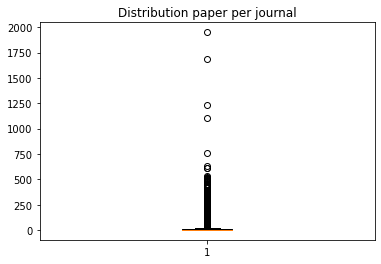

In [24]:
plt.boxplot(Counter(df_00_21.journal).values())
plt.title("Distribution paper per journal")

In [25]:
Counter(df_00_21.journal).most_common()

[('SUSTAINABILITY', 1951),
 ('PLOS ONE', 1685),
 ('SCIENCE OF THE TOTAL ENVIRONMENT', 1230),
 ('INTERNATIONAL JOURNAL OF ENVIRONMENTAL RESEARCH AND PUBLIC HEALTH', 1109),
 ('TRANSYLVANIAN REVIEW', 762),
 ('SCIENTIFIC REPORTS', 633),
 ('REVISTA DE CHIMIE', 615),
 ('WATER', 612),
 ('JOURNAL OF CLEANER PRODUCTION', 537),
 ('ZOOTAXA', 521),
 ('METALURGIA INTERNATIONAL', 515),
 ('NATURAL HAZARDS AND EARTH SYSTEM SCIENCES', 510),
 ('ATMOSPHERIC ENVIRONMENT', 509),
 ('ENERGIES', 503),
 ('ENVIRONMENTAL SCIENCE AND POLLUTION RESEARCH', 502),
 ('JOURNAL OF ENVIRONMENTAL PROTECTION AND ECOLOGY', 498),
 ('ORVOSI HETILAP', 491),
 ('REMOTE SENSING', 484),
 ('SCIENTIFIC PAPERS-SERIES MANAGEMENT ECONOMIC ENGINEERING IN AGRICULTURE\nAND RURAL DEVELOPMENT',
  480),
 ('QUATERNARY INTERNATIONAL', 473),
 ('EPIDEMIOLOGIA \\& PREVENZIONE', 458),
 ('ACTA MEDICA PORTUGUESA', 455),
 ('PLANT BIOSYSTEMS', 449),
 ('ENVIRONMENTAL ENGINEERING AND MANAGEMENT JOURNAL', 438),
 ('GEOMORPHOLOGY', 433),
 ('AMFITEATRU ECON